In [6]:
#Notebook originally by Tom Huang (tj2huang), modified by Anas Elghafari to add google trend data
library(dplyr)

In [89]:
alc_june = read.csv("data/alc-june.csv")
alc_sept = read.csv('data/alc-sept.csv')

In [90]:
turn_to_week <- function(df_june, df_sept){
    df_j <- df_june
    df_s <- df_sept
    df_j[,1] <- (df_j[,1] -1)%%7
    df_s[,1] <- (df_s[,1])%%7
    comb <- rbind(df_j[25:(24*28+24),], df_s[1:(24*28),])
    return(comb)
    
}

correlations <- function(ts1, ts2){
    list(pearson=cor(ts1, ts2, method='pearson'), cross=ccf(ts1, ts2))
}

In [91]:
alc <- turn_to_week(alc_june, alc_sept)

In [92]:
proportion <- alc %>% group_by(Unnamed..0, Unnamed..1) %>% summarize(prop=sum(casual)/sum(total))

In [93]:
alc_foursquare <- read.csv('data/alc-foursquare.csv')

In [94]:
counts <- read.csv('data/counts.csv')

In [163]:
#reading in google trends CSV
alc_trends <- read.csv('alc_trends_sum_normalized.csv')
alc_buying_trends <-read.csv('buying_alcohol_VALs.csv')
drunk_trend <- read.csv('drunk_vals.csv')
hangover_trend <- read.csv('hangover_VALS.csv')


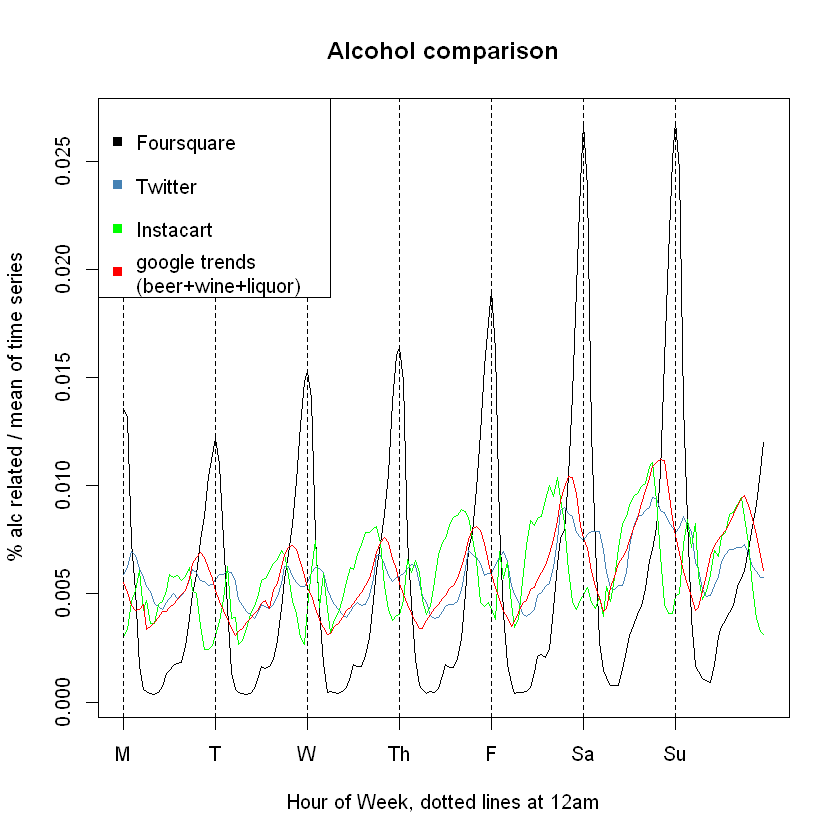

In [164]:
plot.ts(alc_foursquare[,3]/sum(alc_foursquare[,3]), xaxt='n', main='Alcohol comparison', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(proportion[,3]/sum(proportion[,3]), col='steelblue')
lines(counts[,6]/sum(counts[,6]), col='green')
lines(alc_trends/sum(alc_trends), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('Foursquare', 'Twitter', 'Instacart', 'google trends\n(beer+wine+liquor)'), col=c('black', 'steelblue', 'green', 'red'),pch=15)

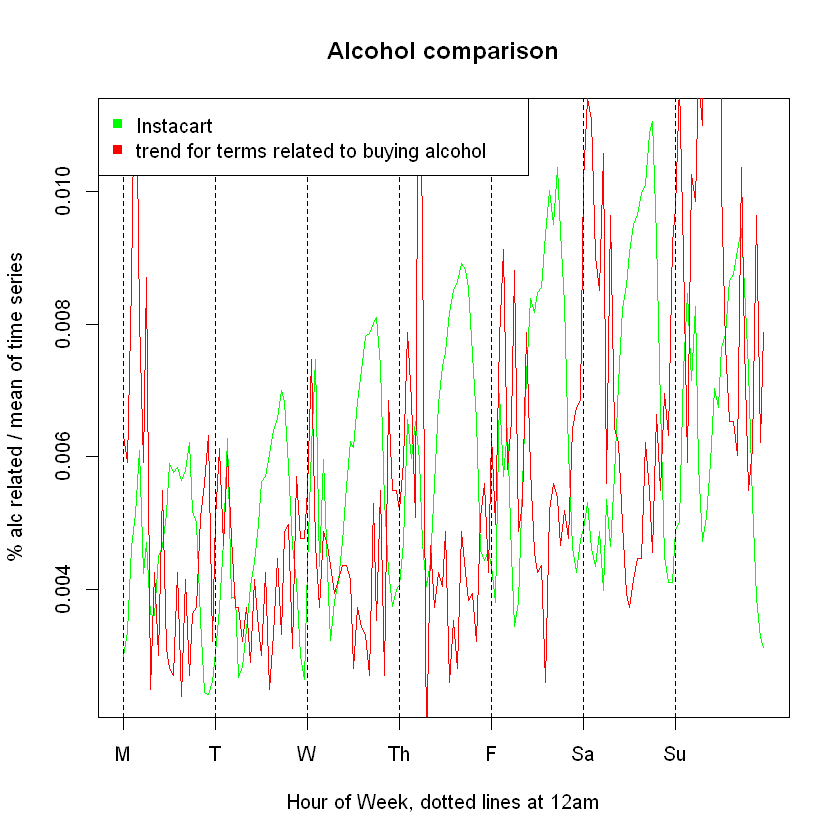

$pearson
[1] -0.05293177

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
 0.266  0.340  0.429  0.483  0.515  0.483  0.445  0.394  0.355  0.322  0.307 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
 0.317  0.313  0.263  0.148  0.075 -0.017 -0.075 -0.061 -0.053 -0.019 -0.012 
     3      4      5      6      7      8      9     10     11     12     13 
 0.026  0.080  0.141  0.218  0.297  0.349  0.364  0.349  0.312  0.273  0.265 
    14     15     16     17     18     19 
 0.226  0.204  0.164  0.109  0.028 -0.065 


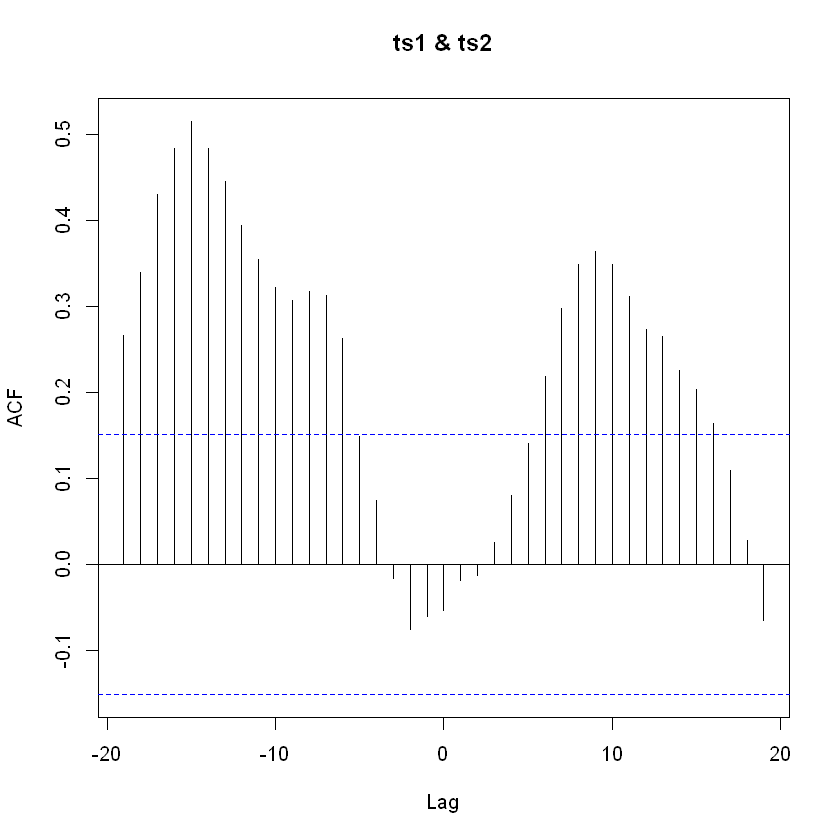

In [165]:
plot.ts(counts[,6]/sum(counts[,6]),col='green', xaxt='n', main='Alcohol comparison', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(alc_buying_trends/sum(alc_buying_trends), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('Instacart', 'trend for terms related to buying alcohol'), col=c('green', 'red'),pch=15)
correlations(counts[,6], alc_buying_trends[,1])

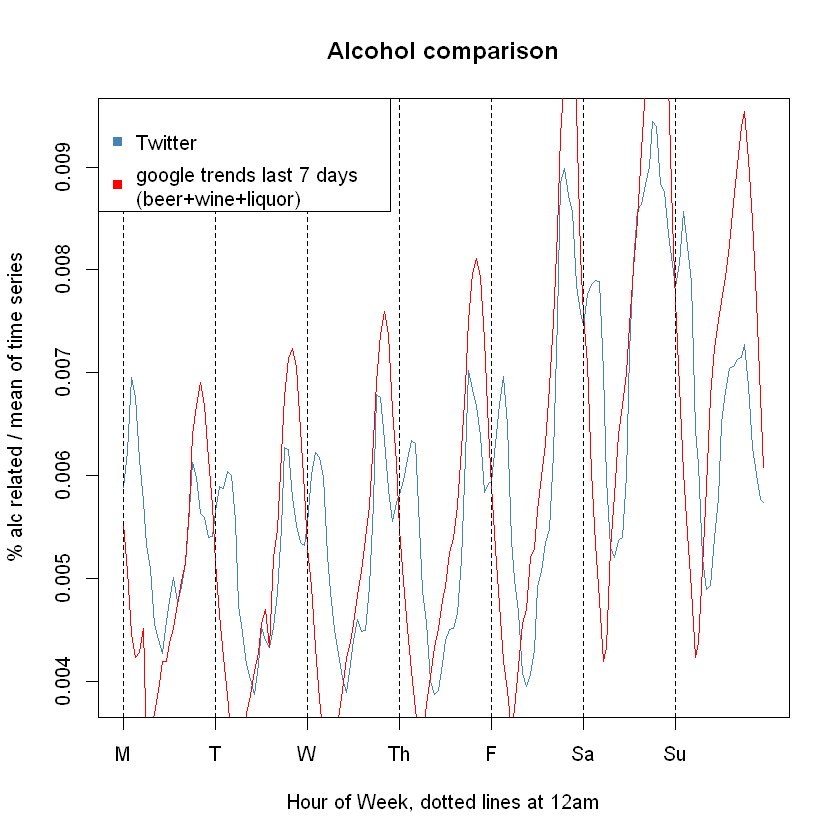

In [166]:
plot.ts(proportion[,3]/sum(proportion[,3]), col='steelblue', xaxt='n', main='Alcohol comparison', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
#lines(counts[,6]/sum(counts[,6]), col='green')
lines(alc_trends/sum(alc_trends), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('Twitter', 'google trends last 7 days\n(beer+wine+liquor)'), col=c('steelblue','red'),pch=15)



$pearson
      ï..sum
prop 0.71835

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
 0.705  0.668  0.597  0.496  0.368  0.226  0.082 -0.043 -0.132 -0.168 -0.153 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
-0.098 -0.015  0.082  0.190  0.307  0.428  0.541  0.639  0.718  0.771  0.800 
     3      4      5      6      7      8      9     10     11     12     13 
 0.806  0.790  0.748  0.680  0.580  0.455  0.312  0.165  0.030 -0.076 -0.140 
    14     15     16     17     18     19 
-0.156 -0.129 -0.071  0.007  0.093  0.180 


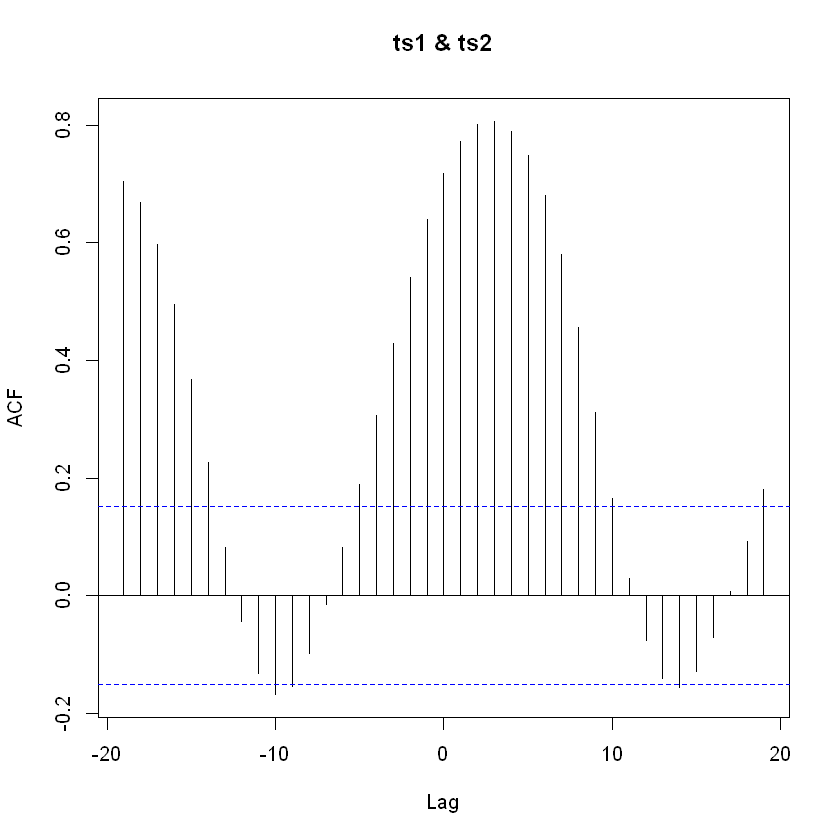

In [167]:
correlations(proportion[,3], alc_trends)

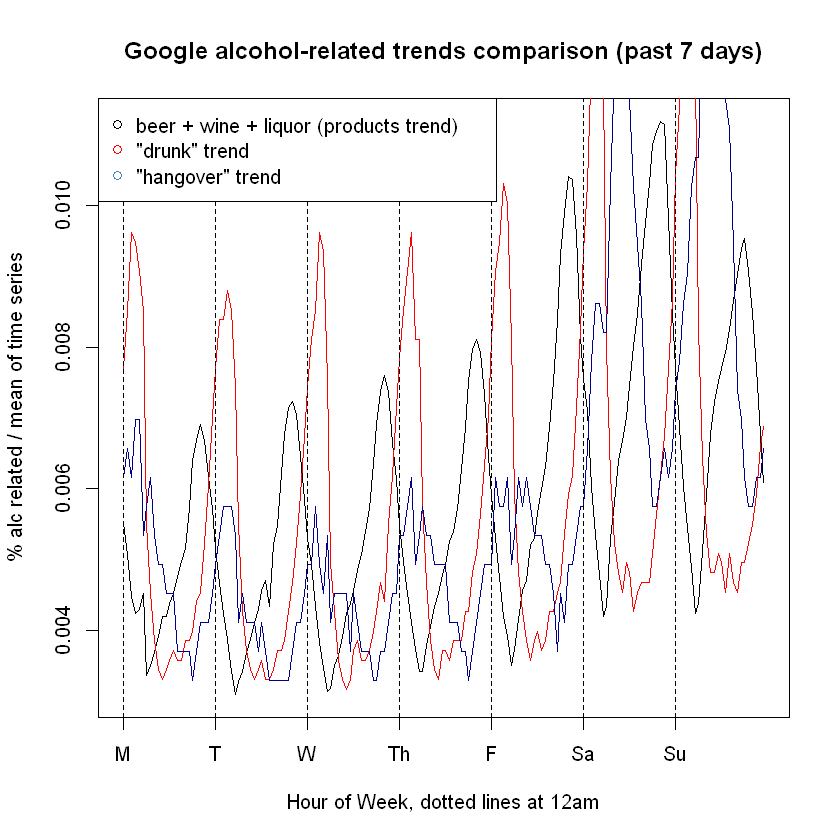

In [171]:
plot.ts(alc_trends/sum(alc_trends), col='black', xaxt='n', main='Google alcohol-related trends comparison (past 7 days)', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
#lines(alc_buying_trends/sum(alc_buying_trends), col='green')
lines(drunk_trend/sum(drunk_trend), col='red')
lines(hangover_trend/sum(hangover_trend), col='darkblue')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('beer + wine + liquor (products trend)', '"drunk" trend', '"hangover" trend'), col=c('black','red', 'steelblue'),pch=1)

[1] "correlations of products trend to drunk trend"


$pearson
[1] -0.09910994

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
-0.378 -0.341 -0.283 -0.207 -0.116 -0.008  0.115  0.255  0.407  0.556  0.689 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
 0.787  0.829  0.812  0.739  0.618  0.458  0.274  0.083 -0.099 -0.252 -0.358 
     3      4      5      6      7      8      9     10     11     12     13 
-0.417 -0.430 -0.406 -0.354 -0.282 -0.195 -0.096  0.018  0.145  0.288  0.438 
    14     15     16     17     18     19 
 0.580  0.697  0.774  0.791  0.749  0.657 


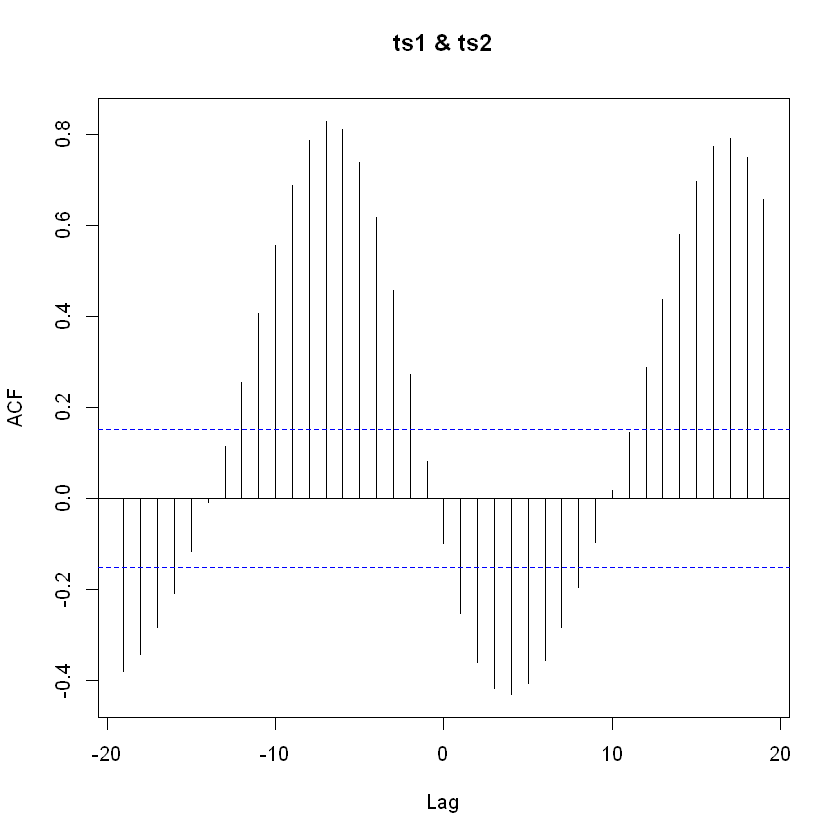

In [174]:
print("correlations of products trend to drunk trend")
correlations(alc_trends[,1], drunk_trend[,1])

[1] "correlations of drunk trend to hangover trend"


$pearson
           ï..hangover_vals
drunk_vals        0.2760407

$cross

Autocorrelations of series 'X', by lag

   -19    -18    -17    -16    -15    -14    -13    -12    -11    -10     -9 
-0.139 -0.162 -0.162 -0.138 -0.088 -0.009  0.094  0.216  0.337  0.451  0.549 
    -8     -7     -6     -5     -4     -3     -2     -1      0      1      2 
 0.613  0.649  0.650  0.618  0.563  0.490  0.415  0.342  0.276  0.200  0.119 
     3      4      5      6      7      8      9     10     11     12     13 
 0.034 -0.047 -0.109 -0.153 -0.172 -0.169 -0.146 -0.101 -0.035  0.041  0.122 
    14     15     16     17     18     19 
 0.199  0.264  0.314  0.344  0.354  0.348 


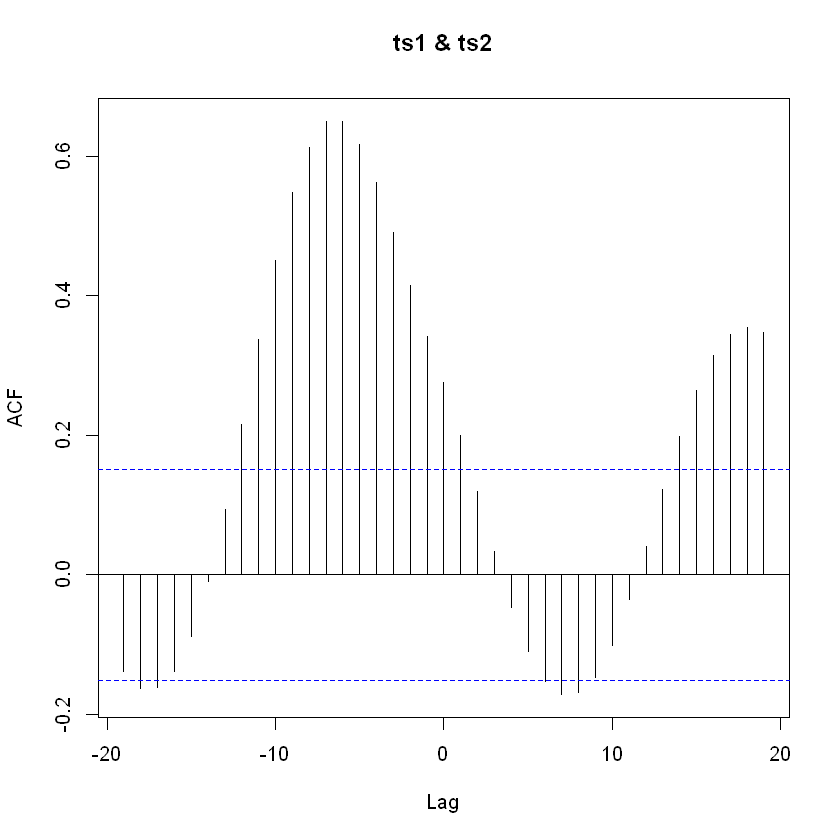

In [175]:
print("correlations of drunk trend to hangover trend")
correlations(drunk_trend, hangover_trend)

[1] "correlations of alc product trend to hangover trend"


$pearson
       ï..hangover_vals
ï..sum        0.1602189

$cross

Autocorrelations of series 'X', by lag

  -19   -18   -17   -16   -15   -14   -13   -12   -11   -10    -9    -8    -7 
0.416 0.513 0.604 0.679 0.735 0.765 0.762 0.731 0.676 0.604 0.525 0.450 0.375 
   -6    -5    -4    -3    -2    -1     0     1     2     3     4     5     6 
0.305 0.244 0.196 0.165 0.149 0.148 0.160 0.185 0.224 0.280 0.350 0.425 0.497 
    7     8     9    10    11    12    13    14    15    16    17    18    19 
0.556 0.599 0.623 0.626 0.608 0.569 0.517 0.456 0.393 0.332 0.272 0.213 0.154 


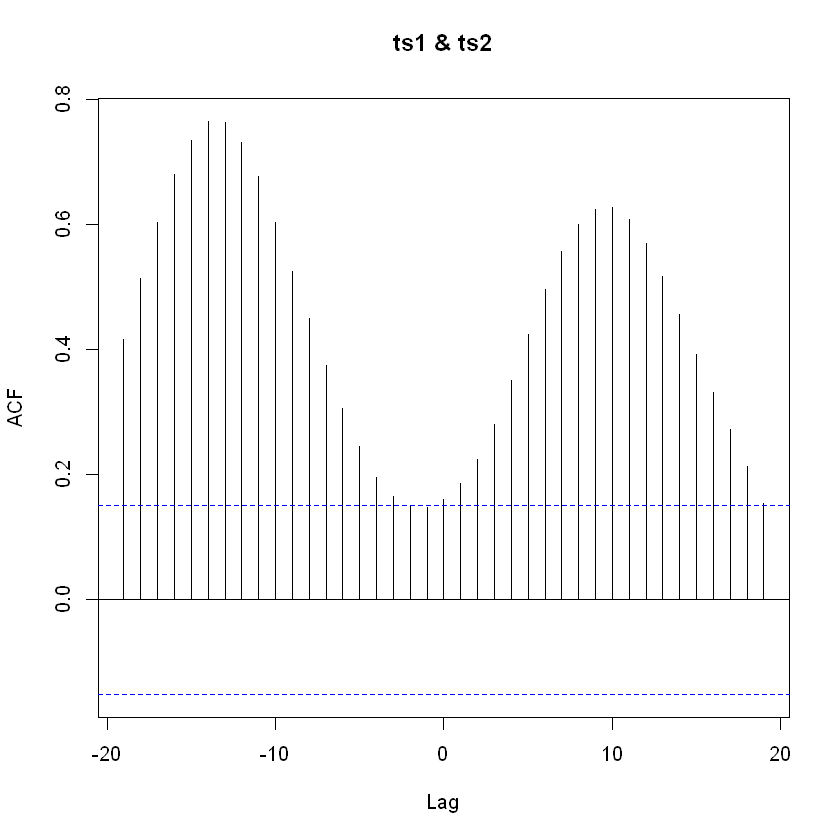

In [155]:
print("correlations of alc product trend to hangover trend")
correlations(alc_trends, hangover_trend)

In [51]:
tob_june = read.csv("data/tob-june.csv")
tob_sept = read.csv('data/tob-sept.csv')
shi_june = read.csv("data/shisha-june.csv")
shi_sept = read.csv('data/shisha-sept.csv')


In [52]:
tob <- turn_to_week(tob_june, tob_sept)
shi <- turn_to_week(shi_june, shi_sept)

In [53]:
head(tob)

,day,hour,sum,len
25,1,0,13,5661
26,1,1,9,3608
27,1,2,7,2210
28,1,3,3,1648
29,1,4,1,1384
30,1,5,1,1843


In [60]:
tob_foursquare <- read.csv('data/tob-foursquare.csv')
tob_trends <- read.csv('non-hookah-tobacco.csv')
shisha_trends <- read.csv('hookah_trends_normalized.csv')


In [61]:
prop_tob <- tob %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))
prop_shi <- shi %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))

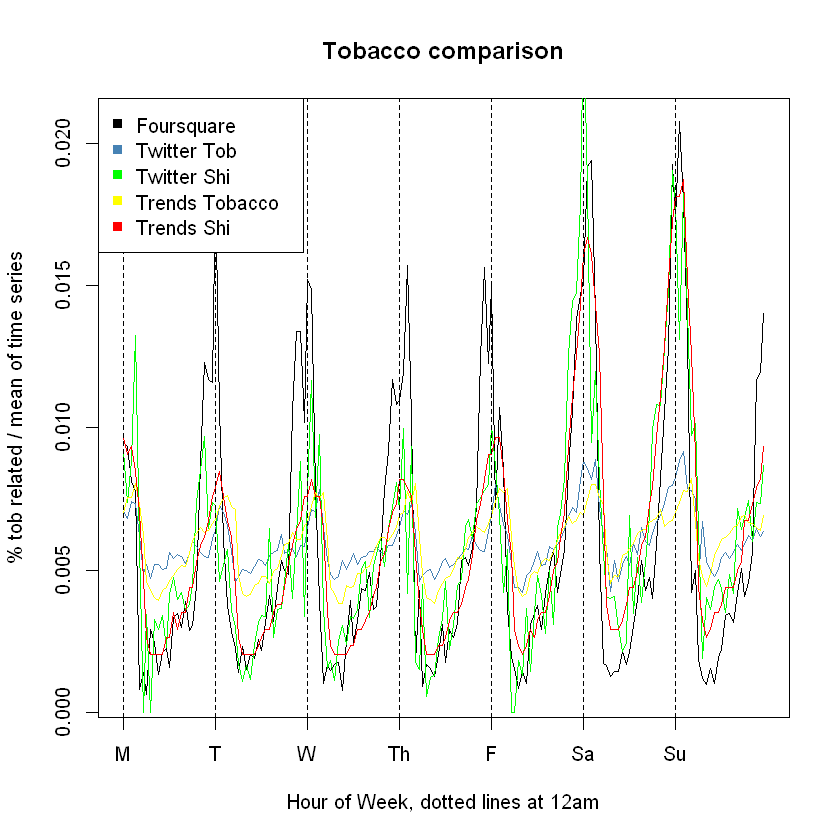

In [73]:
plot.ts(tob_foursquare[,3]/sum(tob_foursquare[,3]), xaxt='n', main='Tobacco comparison', ylab='% tob related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(prop_tob[,3]/sum(prop_tob[,3]), col='steelblue')
lines(prop_shi[,3]/sum(prop_shi[,3]), col='green')
lines(tob_trends/sum(tob_trends), col='yellow')
lines(shisha_trends/sum(shisha_trends), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('Foursquare', 'Twitter Tob', 'Twitter Shi', 'Trends Tobacco', 'Trends Shi'), col=c('black', 'steelblue', 'green', 'yellow', 'red'),pch=15)

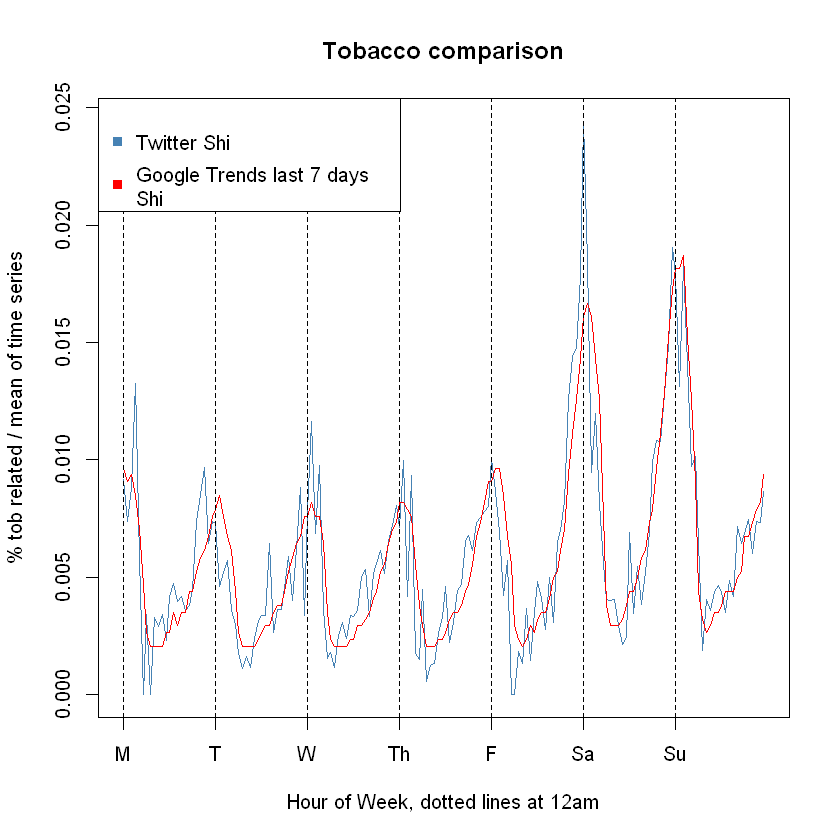

In [87]:
plot.ts(prop_shi[,3]/sum(prop_shi[,3]),col='steelblue', xaxt='n', main='Tobacco comparison', ylab='% tob related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
#lines(tob_trends/sum(tob_trends), col='yellow')
lines(shisha_trends/sum(shisha_trends), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topleft", legend=c('Twitter Shi', 'Google Trends last 7 days\nShi'), col=c('steelblue', 'red'),pch=15)

$pearson
       ï..sum
day 0.3471869

$cross

Autocorrelations of series 'X', by lag

  -19   -18   -17   -16   -15   -14   -13   -12   -11   -10    -9    -8    -7 
0.330 0.332 0.331 0.331 0.328 0.324 0.319 0.313 0.306 0.300 0.293 0.285 0.277 
   -6    -5    -4    -3    -2    -1     0     1     2     3     4     5     6 
0.272 0.273 0.282 0.295 0.312 0.331 0.347 0.361 0.372 0.379 0.382 0.382 0.377 
    7     8     9    10    11    12    13    14    15    16    17    18    19 
0.374 0.368 0.363 0.355 0.346 0.337 0.328 0.317 0.307 0.297 0.286 0.275 0.263 


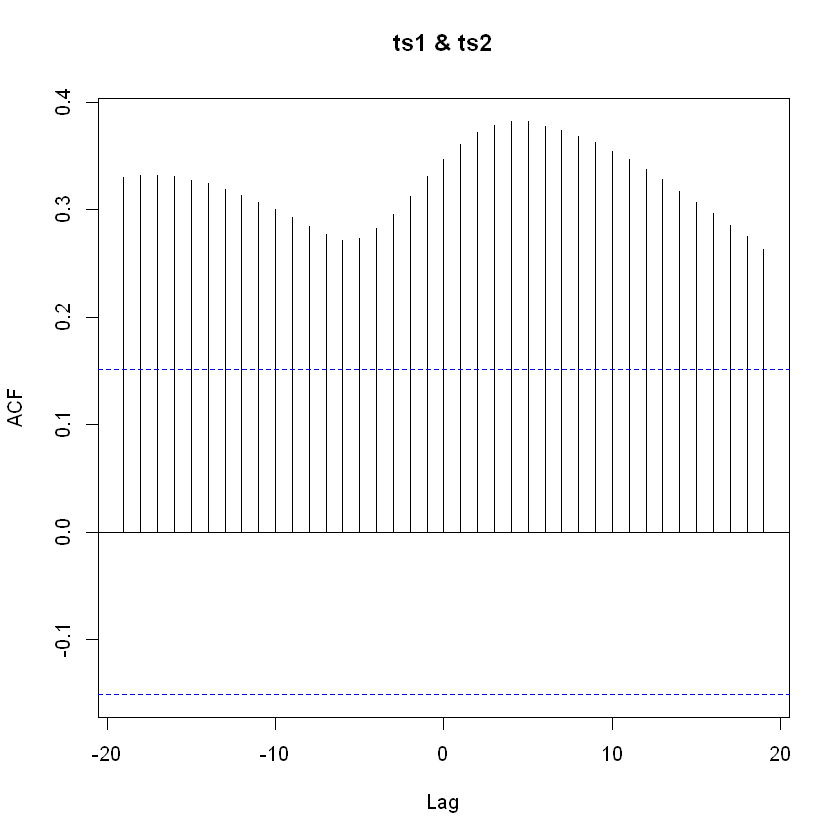

In [176]:
correlations(prop_shi[,1], shisha_trends)